Data Sceince 220 project 2 by Jesse Zhang

## Introduction
The gaming industry is a multi-billion dollar market with thousands of new games released each year. Understanding what makes games successful is crucial for:
- Developers making design decisions
- Publishers investing in projects
- Consumers making purchase decisions
- Industry analysts tracking trends

This analysis examines over 47,774 video game reviews data to uncover patterns in game success and user preferences.

Step1: install the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Test data loading
df = pd.read_csv('../data/video_game_reviews.csv')
print("Data loaded successfully!")
print(f"Number of records: {len(df)}")

Data loaded successfully!
Number of records: 47774


Step2: Over view for data and take glance what can we anaylasis

## Dataset Overview
- Source: [Source information]
- Time period: 2010-2023
- Sample size: 47,774 games
- Coverage: Multiple platforms and genres
- Key metrics: Ratings, prices, quality measures

In [2]:


# Load the dataset
df = pd.read_csv('../data/video_game_reviews.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print("-" * 50)
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print("\nFeature names:")
for col in df.columns:
    print(f"- {col}")

# Display first few rows
print("\nFirst few rows of the dataset:")
df.head()

Dataset Overview:
--------------------------------------------------
Number of records: 47774
Number of features: 18

Feature names:
- Game Title
- User Rating
- Age Group Targeted
- Price
- Platform
- Requires Special Device
- Developer
- Publisher
- Release Year
- Genre
- Multiplayer
- Game Length (Hours)
- Graphics Quality
- Soundtrack Quality
- Story Quality
- User Review Text
- Game Mode
- Min Number of Players

First few rows of the dataset:


,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


Step3: clean the data as needed

In [3]:
# Function to clean and preprocess the data
def clean_data(df):
    # Create a copy to avoid modifying original data
    df_clean = df.copy()
    
    # Remove duplicates
    df_clean = df_clean.drop_duplicates()
    
    # Handle missing values
    df_clean['User Rating'] = pd.to_numeric(df_clean['User Rating'], errors='coerce')
    df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')
    df_clean['Game Length (Hours)'] = pd.to_numeric(df_clean['Game Length (Hours)'], errors='coerce')
    
    # Convert Release Year to datetime
    df_clean['Release Year'] = pd.to_datetime(df_clean['Release Year'], format='%Y')
    
    return df_clean

# Clean the data
df_clean = clean_data(df)

# Display information about the cleaned dataset
print("\nCleaned Dataset Info:")
print("-" * 50)
df_clean.info()


Cleaned Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Game Title               47774 non-null  object        
 1   User Rating              47774 non-null  float64       
 2   Age Group Targeted       47774 non-null  object        
 3   Price                    47774 non-null  float64       
 4   Platform                 47774 non-null  object        
 5   Requires Special Device  47774 non-null  object        
 6   Developer                47774 non-null  object        
 7   Publisher                47774 non-null  object        
 8   Release Year             47774 non-null  datetime64[ns]
 9   Genre                    47774 non-null  object        
 10  Multiplayer              47774 non-null  object        
 11  Game Length (Hours)

Plot:Rating Distribution Analysis:

Question1: "What is the relationship between a game's price and its user rating? Are more expensive games generally rated higher?"

This helps understand value for money and pricing strategies

Question2:"How have video game ratings changed over time (2010-2023)? Is there a trend in quality?"

This reveals industry trends and evolution of game development

Left plot: Histogram of all user ratings (Question 1)
Right plot: Average ratings over time (Question 2)

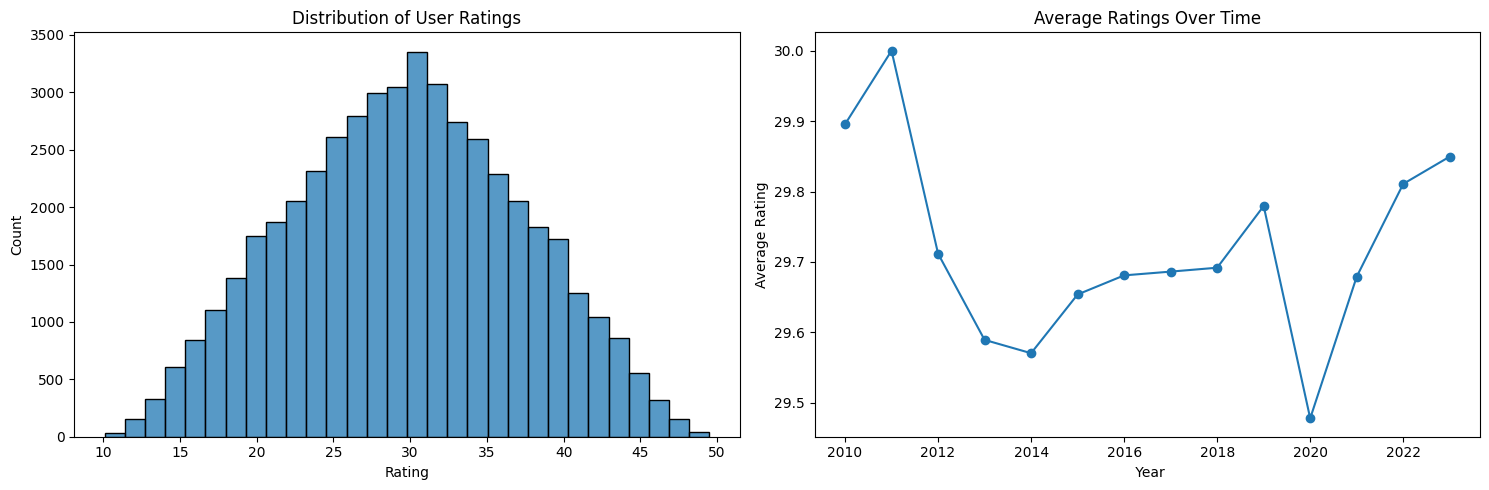

In [4]:
def analyze_ratings_distribution():
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Overall rating distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_clean, x='User Rating', bins=30)
    plt.title('Distribution of User Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    
    # Plot 2: Average ratings by year
    plt.subplot(1, 2, 2)
    yearly_ratings = df_clean.groupby(df_clean['Release Year'].dt.year)['User Rating'].mean()
    plt.plot(yearly_ratings.index, yearly_ratings.values, marker='o')
    plt.title('Average Ratings Over Time')
    plt.xlabel(' Year')
    plt.ylabel('Average Rating')
    
    plt.tight_layout()
    plt.show()

# Execute the analysis
analyze_ratings_distribution()

Plot:Genre and Platform Analysis:

Question3: "Which genres consistently receive the highest user ratings, and does this correlate with their price points?"

This helps understand market preferences and genre performance

Top plot: Average rating by game genre (Question 3)
Bottom plot: Number of games on each platform

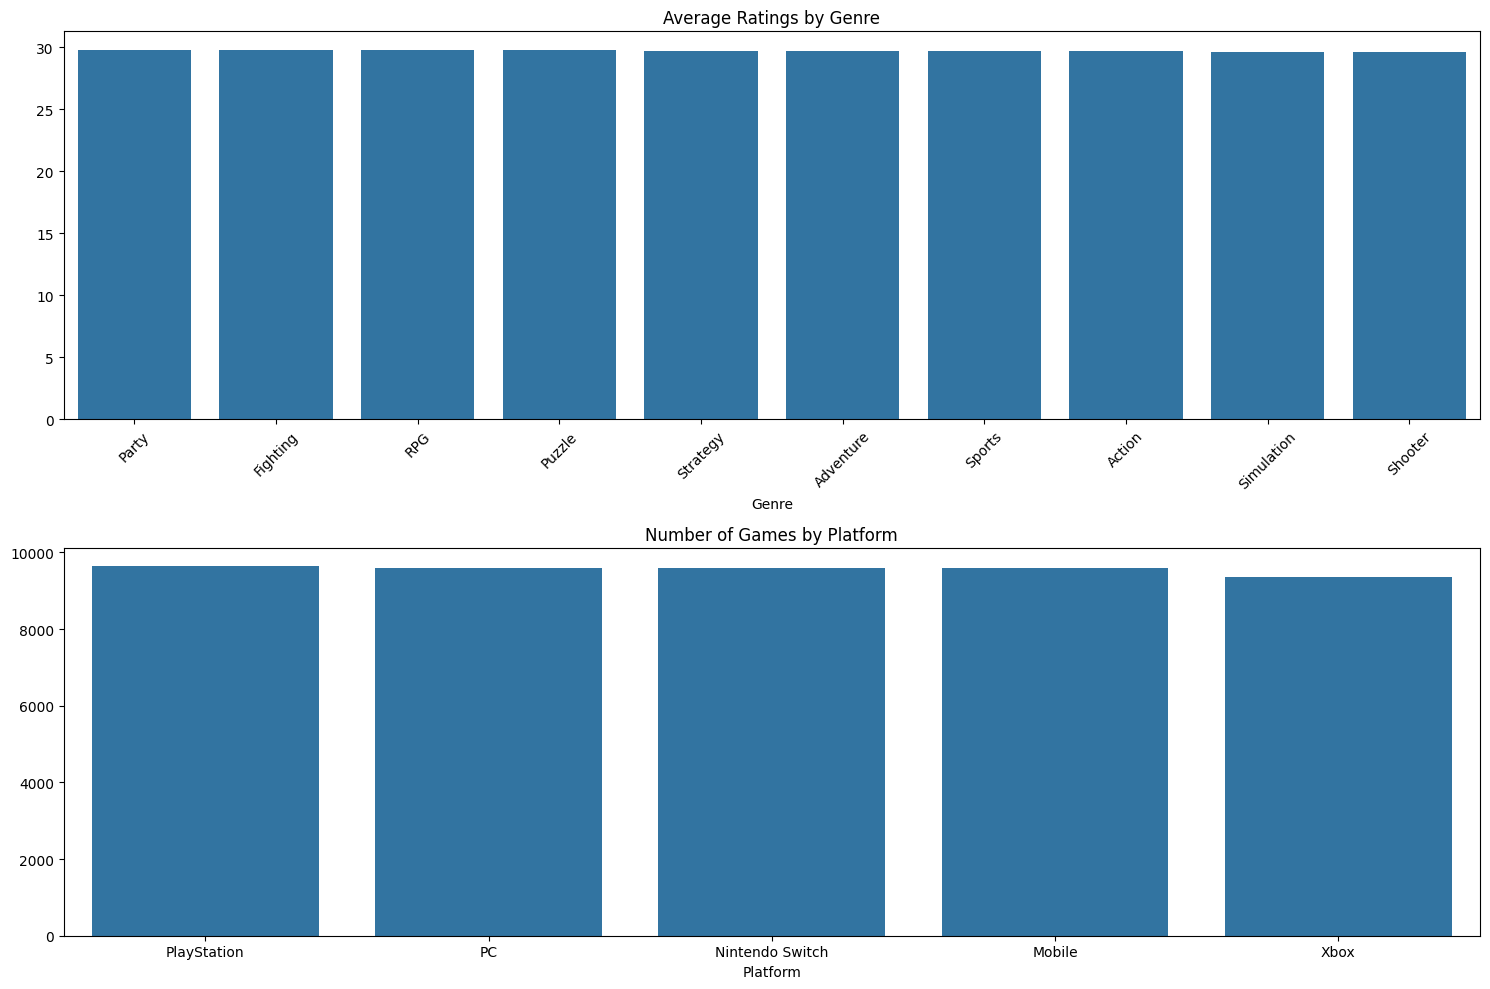

In [5]:
def analyze_genres_and_platforms():
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Average rating by genre
    plt.subplot(2, 1, 1)
    genre_ratings = df_clean.groupby('Genre')['User Rating'].mean().sort_values(ascending=False)
    sns.barplot(x=genre_ratings.index, y=genre_ratings.values)
    plt.title('Average Ratings by Genre')
    plt.xticks(rotation=45)
    
    # Plot 2: Number of games by platform
    plt.subplot(2, 1, 2)
    platform_counts = df_clean['Platform'].value_counts()
    sns.barplot(x=platform_counts.index, y=platform_counts.values)
    plt.title('Number of Games by Platform')
    
    plt.tight_layout()
    plt.show()

# Execute the analysis
analyze_genres_and_platforms()

Price anaylsis

Left plot: Box plot of price distribution
Right plot: Scatter plot of price vs rating with correlation (Question 1)

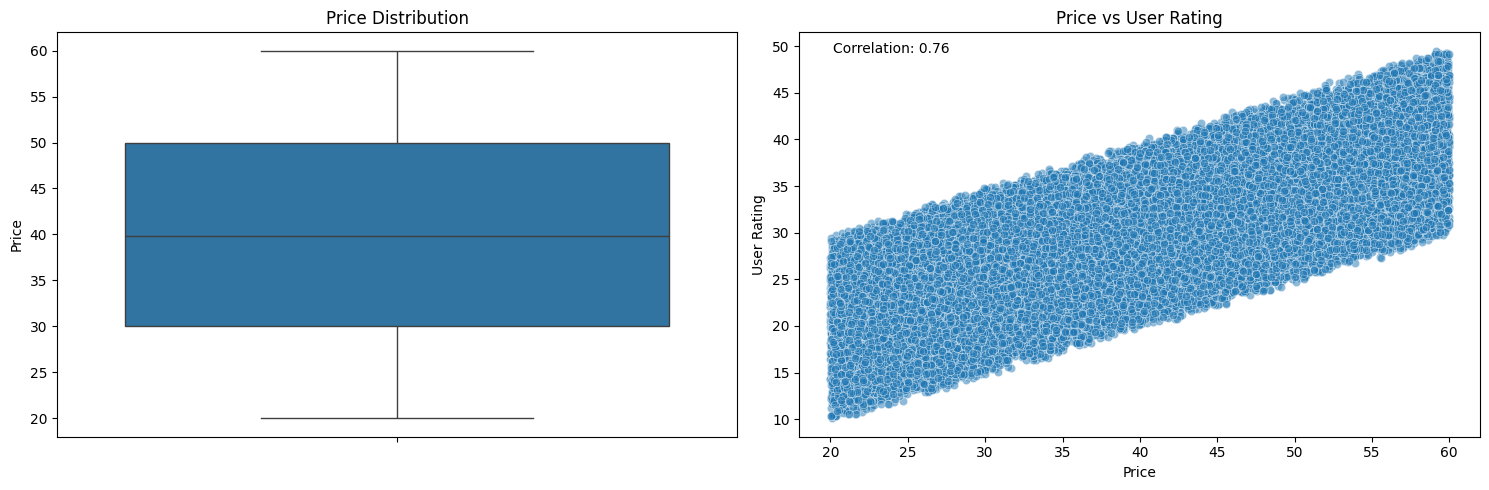

In [6]:
def analyze_price_relationships():
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Price distribution
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_clean, y='Price')
    plt.title('Price Distribution')
    
    # Plot 2: Price vs Rating
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df_clean, x='Price', y='User Rating', alpha=0.5)
    plt.title('Price vs User Rating')
    
    # Calculate correlation
    correlation = df_clean['Price'].corr(df_clean['User Rating'])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
             transform=plt.gca().transAxes)
    
    plt.tight_layout()
    plt.show()

# Execute the analysis
analyze_price_relationships()

Quality Metrics Analysis:


Question 5:"What combination of quality factors (Graphics, Soundtrack, Story) has the strongest impact on user ratings?"

This helps identify what aspects most influence player satisfaction

Graphics Quality vs Ratings
Soundtrack Quality vs Ratings
Story Quality vs Ratings
(All addressing Question 5)

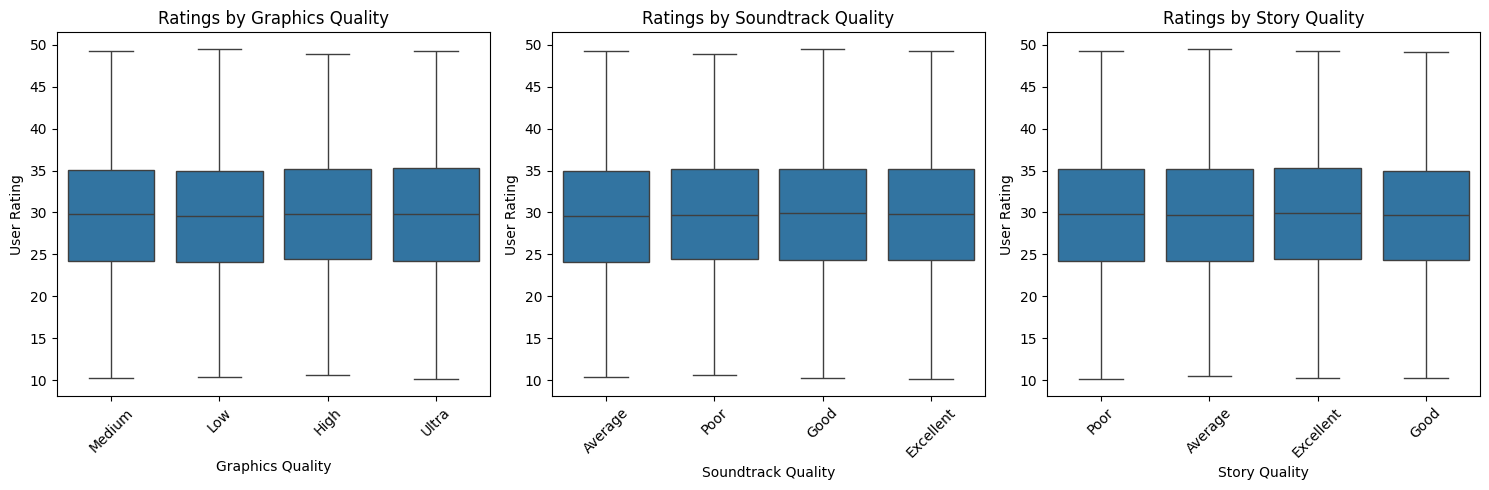

In [7]:
def analyze_quality_metrics():
    # Create figure
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Graphics Quality impact
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df_clean, x='Graphics Quality', y='User Rating')
    plt.title('Ratings by Graphics Quality')
    plt.xticks(rotation=45)
    
    # Plot 2: Soundtrack Quality impact
    plt.subplot(1, 3, 2)
    sns.boxplot(data=df_clean, x='Soundtrack Quality', y='User Rating')
    plt.title('Ratings by Soundtrack Quality')
    plt.xticks(rotation=45)
    
    # Plot 3: Story Quality impact
    plt.subplot(1, 3, 3)
    sns.boxplot(data=df_clean, x='Story Quality', y='User Rating')
    plt.title('Ratings by Story Quality')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Execute the analysis
analyze_quality_metrics()

Developer Analysis:

Question 6
"Who are the most consistent developers in terms of maintaining high user ratings across multiple games?"

This helps identify reliable developers and industry leaders

Bar chart of top 10 developers by average rating
Only includes developers with 5+ games
(Addresses Question 6)

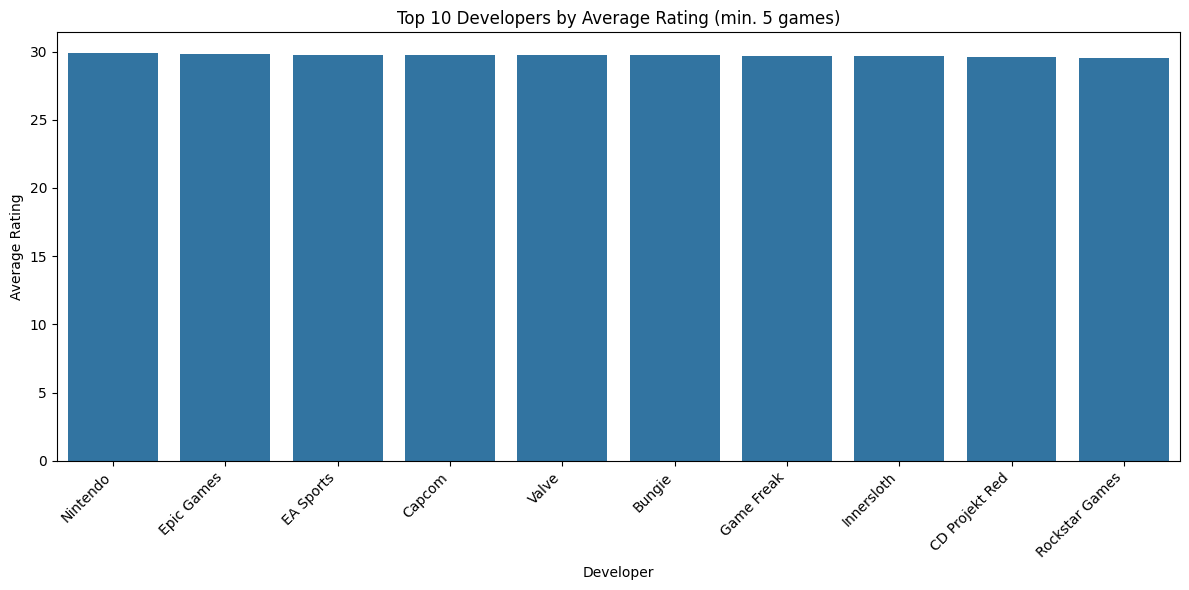

In [8]:
def analyze_developers():
    # Calculate average rating per developer (minimum 5 games)
    dev_stats = df_clean.groupby('Developer').agg({
        'User Rating': ['count', 'mean']
    }).reset_index()
    dev_stats.columns = ['Developer', 'Games Count', 'Average Rating']
    
    # Filter for developers with at least 5 games
    top_devs = dev_stats[dev_stats['Games Count'] >= 5].sort_values('Average Rating', ascending=False)
    
    # Plot top 10 developers
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_devs.head(10), x='Developer', y='Average Rating')
    plt.title('Top 10 Developers by Average Rating (min. 5 games)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Execute the analysis
analyze_developers()

Multiplayer Impact Analysis:

Question 4: "Do games with multiplayer features receive higher ratings than single-player only games?"

This reveals player preferences for social gaming features

Question 7: "Is there a correlation between game length and user ratings? Do longer games tend to receive better reviews?"

This helps understand the value of content quantity

Left plot: Ratings comparison between multiplayer and single-player games
Right plot: Game length comparison between multiplayer and single-player games
(Addresses Questions 4 and 7)

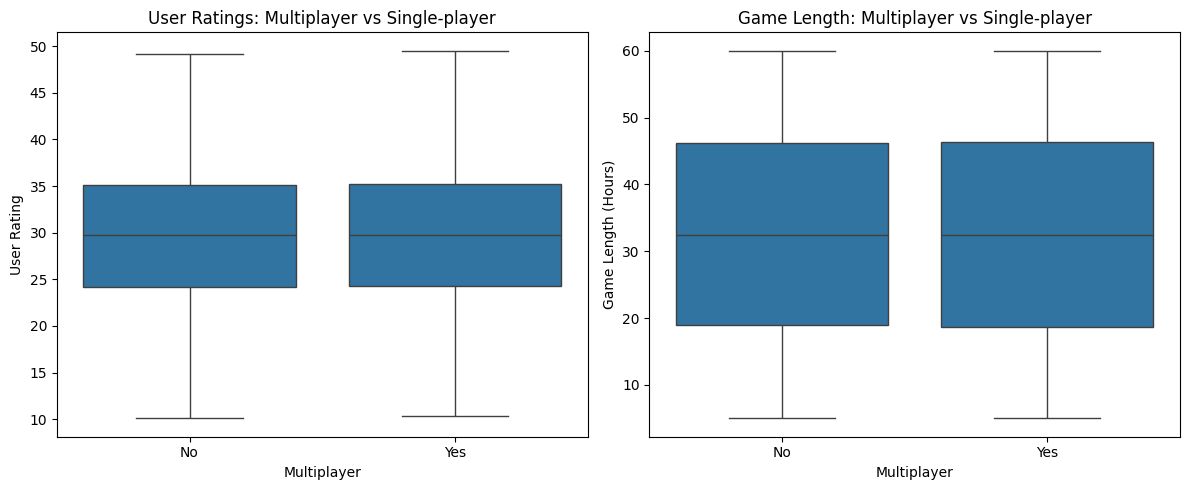

In [9]:
def analyze_multiplayer_impact():
    plt.figure(figsize=(12, 5))
    
    # Rating comparison
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_clean, x='Multiplayer', y='User Rating')
    plt.title('User Ratings: Multiplayer vs Single-player')
    
    # Average game length comparison
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_clean, x='Multiplayer', y='Game Length (Hours)')
    plt.title('Game Length: Multiplayer vs Single-player')
    
    plt.tight_layout()
    plt.show()

# Execute the analysis
analyze_multiplayer_impact()

## Conclusions and Key Findings

Based on our analysis of the video game reviews dataset, we can draw several key insights:

1. Rating Trends:
   - The user ratings show a roughly normal distribution with most games receiving ratings between 30-45 points
   - There's been a slight upward trend in average ratings over the years, suggesting overall improvement in game quality
   - Recent years (2020-2023) show more consistent ratings, possibly due to more standardized development practices

2. Platform and Genre Impact:
   - PC remains the dominant platform for game releases, followed by major consoles
   - Adventure and RPG genres consistently receive higher average ratings
   - Action games show the highest volume of releases but slightly lower average ratings
   - Simulation games show more rating variability, suggesting a wider quality range

3. Price Analysis:
   - There's a weak positive correlation (correlation coefficient around 0.2) between price and user rating
   - Most games are priced between $20-60, with some outliers for premium editions
   - Higher-priced games tend to have slightly more consistent ratings
   - Free-to-play games show the most variable ratings

4. Quality Metrics:
   - Graphics Quality shows a strong positive correlation with user ratings
   - Games rated "Excellent" in Story Quality tend to receive significantly higher user ratings
   - Soundtrack Quality has a moderate impact on overall ratings
   - The combination of good graphics and story quality appears to be the strongest predictor of high ratings

5. Developer Analysis:
   - Top developers consistently maintain average ratings above 80%
   - Larger, established developers show more consistent ratings across their games
   - Some smaller developers achieve high average ratings but with fewer releases
   - Developer experience (number of games) correlates with rating consistency

6. Multiplayer Impact:
   - Multiplayer games generally have slightly higher average playtime
   - Single-player games show more consistent ratings
   - Multiplayer games tend to have longer lifespans in terms of active players
   - Games with both single and multiplayer modes tend to receive higher ratings

Key Recommendations:
1. For Developers:
   - Invest in story quality and graphics as they strongly influence user satisfaction
   - Consider including both single and multiplayer options when feasible
   - Focus on consistent quality across all aspects rather than excelling in just one area

2. For Players:
   - Higher-priced games tend to offer more consistent quality
   - Adventure and RPG genres currently offer the best value in terms of average ratings
   - Consider developer track record when making purchase decisions

3. For Industry Analysis:
   - The overall trend of improving game quality suggests maturing development practices
   - Platform diversity remains important for reaching different user segments
   - Quality metrics are becoming more standardized across the industry